In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import matplotlib
import splinelib as tsp

(400, 2) (400, 1)


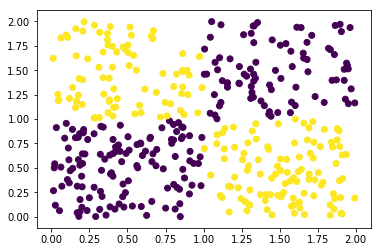

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [3]:
colors = ['r', 'y', 'g', 'b']

### To fit the data we need 2 projection--->prediction

In [4]:
max_points = 10
lr=0.1

linear = tnn.LinearLayer(2,2, optimizer=tnn.SGD(lr))
x_ = linear.forward(x)
x1, x2 = x_[:, 0], x_[:, 1]

spline1 = tsp.Spline1D(max_points, x1, y)
spline2 = tsp.Spline1D(max_points, x2, y)
sigmoid = tnn.Sigmoid()
# sigmoid = tnn.Linear()

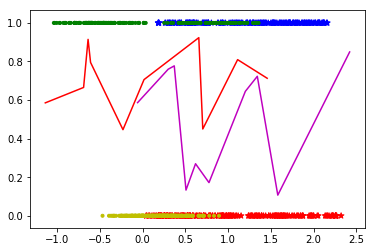

In [5]:
%matplotlib inline
plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

_______________________
Steps 0
Error 0.33857350677020187


_______________________
Steps 100
Error 0.14762606424131539


_______________________
Steps 200
Error 0.0847660515130238


_______________________
Steps 300
Error 0.06456912079346755


_______________________
Steps 400
Error 0.057552284443886464


_______________________
Steps 500
Error 0.04876708538675996


_______________________
Steps 600
Error 0.0517551227878508


_______________________
Steps 700
Error 0.04999823096373822


_______________________
Steps 800
Error 0.15787776068412454


_______________________
Steps 900
Error 0.13277505189788524


_______________________
Steps 1000
Error 0.12323747038588674


_______________________
Steps 1100
Error 0.11755219976540808


_______________________
Steps 1200
Error 0.11413763467009912


_______________________
Steps 1300
Error 0.11154802612852294


_______________________
Steps 1400
Error 0.10890555152831206


_______________________
Steps 1500
Error 0.10743668957943069


_____

TclError: invalid command name "pyimage10"

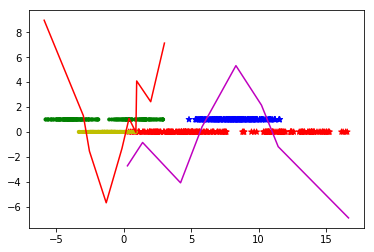

In [6]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
y_ = y.reshape(-1)
for step in range(100000):
    x_ = linear.forward(x)
    x1, x2 = x_[:, 0], x_[:, 1]
    
    Y1 = spline1.forward(x1)
    Y2 = spline2.forward(x2)
    Y = Y1+Y2
    Y = sigmoid.forward(Y)
    dy = Y-y_
    dy1, dy2 = dy, dy
    
    dx_1 = spline1.backward(dy1)
    dx_2 = spline2.backward(dy2)
    
    dx_ = np.c_[dx_1, dx_2]
    dx = linear.backward(dx_)

    spline1.update(lr)
    spline2.update(lr)
    linear.update()
    
    if step % 1000 == 0:
        splines = [spline1, spline2]
        for spline in splines:
            spline._combine_linear_points_()
            spline._remove_close_points_()
            spline._remove_no_input_points_()
            spline._add_new_point_()
                
    if step % 100 == 0:
            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        out = (Y>0.5).astype(int)
        
        plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
        plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
        plt.plot(spline1.X, spline1.Y, color='m')
        plt.plot(spline2.X, spline2.Y, color='r')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
%matplotlib inline
x_ = linear.forward(x)
x1, x2 = x_[:, 0], x_[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
Y = sigmoid.forward(Y1+Y2)
out = (Y>0.5).astype(int)

plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

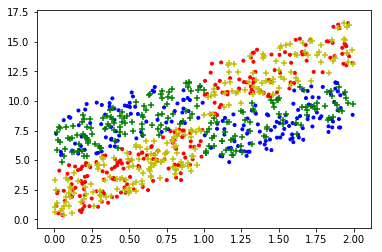

In [7]:
plt.scatter(x[:,0], x1, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x1, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

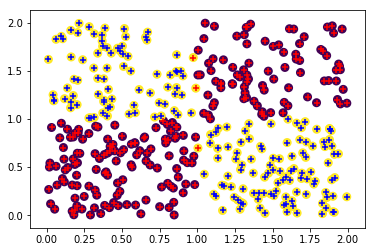

In [8]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=3)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

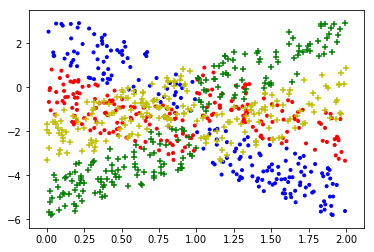

In [9]:
plt.scatter(x[:,0], x2, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x2, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

In [10]:
linear.weights

array([[ 4.06124822, -2.41744708],
       [ 4.5100116 ,  2.35472512]])

In [11]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]
x_ = linear.forward(xxyy)

x1, x2 = x_[:, 0], x_[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
Y = sigmoid.forward(Y1+Y2)
out = (Y>0.5).astype(int)

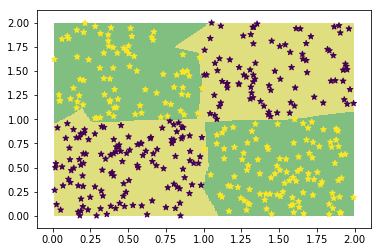

In [12]:
plt.imshow(out.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')